# Analiza letalskih nesreč

## Uvozimo podatke

In [715]:
import pandas as pd
import matplotlib.pyplot as plt

In [716]:
letalske_nesrece = pd.read_csv('rezultati.csv', na_values=['Ni podatka', 'UK'])

## Analiza

In [717]:
colormap = plt.colormaps['tab20']
barve = colormap.colors

In [718]:
meseci_slovar = {'January': 1, 'February': 2, 'March': 3, 'April': 4,
    'May': 5, 'June': 6, 'July': 7, 'August': 8,
    'September': 9, 'October': 10, 'November': 11, 'December': 12, 'Ni podatka': 13}

### Tabela vseh letalskih nesreč

In [719]:
letalske_nesrece['mesec_stevilka'] = letalske_nesrece['mesec'].map(meseci_slovar)
letalske_nesrece = letalske_nesrece.sort_values(by=['leto', 'mesec_stevilka'])
letalske_nesrece = letalske_nesrece.reset_index(drop=True)

In [720]:
letalske_nesrece

,mesec,leto,model_letala,operater,starost_letala,smrtne_zrtve,posadka,razmerje_prezivelih,skoda_letala,vrsta_nesrece,faza_leta,narava_leta,kraj_nesrece,drzava_nesrece,odhodno_letalisce,ciljno_letalisce,mesec_stevilka
0,August,1919,Caproni Ca.48,Caproni,0.0,14.0,14.0,0.0,Destroyed & written off,Accident,En route,Passenger,Verona,Italy,Venice-Marco Polo Airport VCE/LIPZ,Milano-Taliedo Airport,8.0
1,August,1919,Felixstowe Fury,Royal Air Force - RAF,1.0,1.0,7.0,86.0,Destroyed & written off,Accident,Initial climb,Military,Felixtowe RNAS,United Kingdom,Felixstowe RNAS,Felixstowe RNAS,8.0
2,February,1920,Handley Page O/7,Handley Page Transport,1.0,0.0,10.0,100.0,Destroyed & written off,Accident,En route,Passenger - Scheduled,Acadia Siding,South Africa,NaN,NaN,2.0
3,February,1920,Handley Page O/400,Handley Page Transport,NaN,0.0,4.0,100.0,Destroyed & written off,Accident,NaN,NaN,El Shereik,Sudan,Aswan Airport ASW/HESN,Khartoum-Civil Airport KRT/HSSS,2.0
4,June,1920,Handley Page O/400,Handley Page Transport,1.0,0.0,2.0,100.0,Destroyed & written off,Accident,En route,Demo/Airshow/Display,Östanå,Sweden,Stockholm unknown airport,Kjeller Air Base ENKJ,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26578,December,2024,Cessna 560 Citation V Ultra,International Aviation Sales LTD opb Phoenix G...,26.0,0.0,2.0,100.0,Substantial,Accident,Taxi,Ferry/positioning,Hartsfield–Jackson Atlanta International Airport,United States of America,Atlanta Hartsfield-Jackson International Airpo...,Tampa International Airport FL TPA/KTPA,12.0
26579,December,2024,Boeing 737-4Y0 SF,Allied Air,31.0,0.0,6.0,100.0,Substantial,Accident,Landing,Ferry/positioning,Abuja-Nnamdi Azikiwe International Airport,Nigeria,Lagos-Murtala Muhammed International Airport L...,Abuja-Nnamdi Azikiwe International Airport ABV...,12.0
26580,December,2024,Embraer ERJ-145EP,Loganair,NaN,0.0,23.0,100.0,NaN,Accident,Initial climb,Passenger - Scheduled,Edinburgh Airport,United Kingdom,Edinburgh-Turnhouse Airport EDI/EGPH,Southampton-Eastleigh Airport SOU/EGHI,12.0
26581,December,2024,Antonov An-2R,Mobil Avia,NaN,0.0,8.0,100.0,Substantial,Accident,Approach,Passenger - Non-Scheduled/charter/Air Taxi,Tambey Airstrip,Russia,Yamburg Airport USMQ,Tambey Airstrip,12.0


### Število letalskih nesreč po letih

Spodnji graf prikazuje trend števila letalskih nesreč skozi čas, in sicer po posameznih letih. Opazimo lahko izrazizo povečanje etalskih nesreč ravno v obdobju druge svetovne vojne, kar je verjetno posledica povečanega števila vojaških operacij. Več o tem si bomo pogledali v bolj podrobni analizi za leto z največ zabeleženimi letalskimi nesrečami. Prav tako lahko vidimo, da je število nesreč v prvih petnajstih letih razmeroma nizko, kar je verjetno posledica manjše razpoložljivosti informacij in slabšega beleženja oziroma arhiviranja dogodkov v tem obdobju. Poleg tega graf omogoča opazovanje trendov tudi v drugih obdobjih, ki jih je mogoče povezati s tehnološkimi izboljšavami, spremembami v regulaciji ali drugimi dejavniki.

In [721]:
letno_stevilo_nesrec = letalske_nesrece.groupby('leto').size().reset_index(name='letno_stevilo_nesrec')

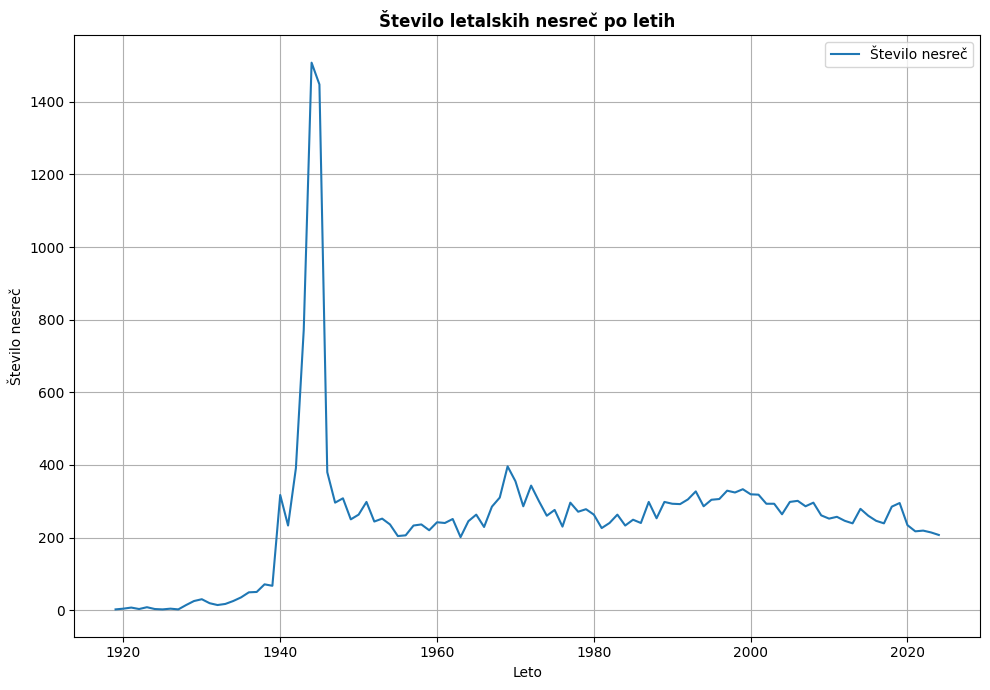

In [722]:
letno_stevilo_nesrec.plot.line(x='leto', y='letno_stevilo_nesrec', figsize=(10, 7))
plt.xlabel('Leto')
plt.ylabel('Število nesreč')
plt.title('Število letalskih nesreč po letih', fontweight='bold')
plt.legend(['Število nesreč'])
plt.tight_layout()
plt.grid(True)

### Število letalskih nesreč po mesecih

Graf prikazuje delež letalskih nesreč po posameznih mesecih. Opazimo, da so meseci z največ nesrečami december, januar in september. Pričakovala sem večje odstopanje v zimskih mesecih, saj lahko zimski pogoji, kot so megla, sneg in poledica, povečajo tveganje za nesreče. Vendar pa podatki kažejo, da so nesreče precej razporejene tudi v drugih mesecih, kar lahko pomeni, da so na varnost letov vplivali tudi drugi dejavniki.

In [723]:
meseci = letalske_nesrece['mesec'].dropna().value_counts()

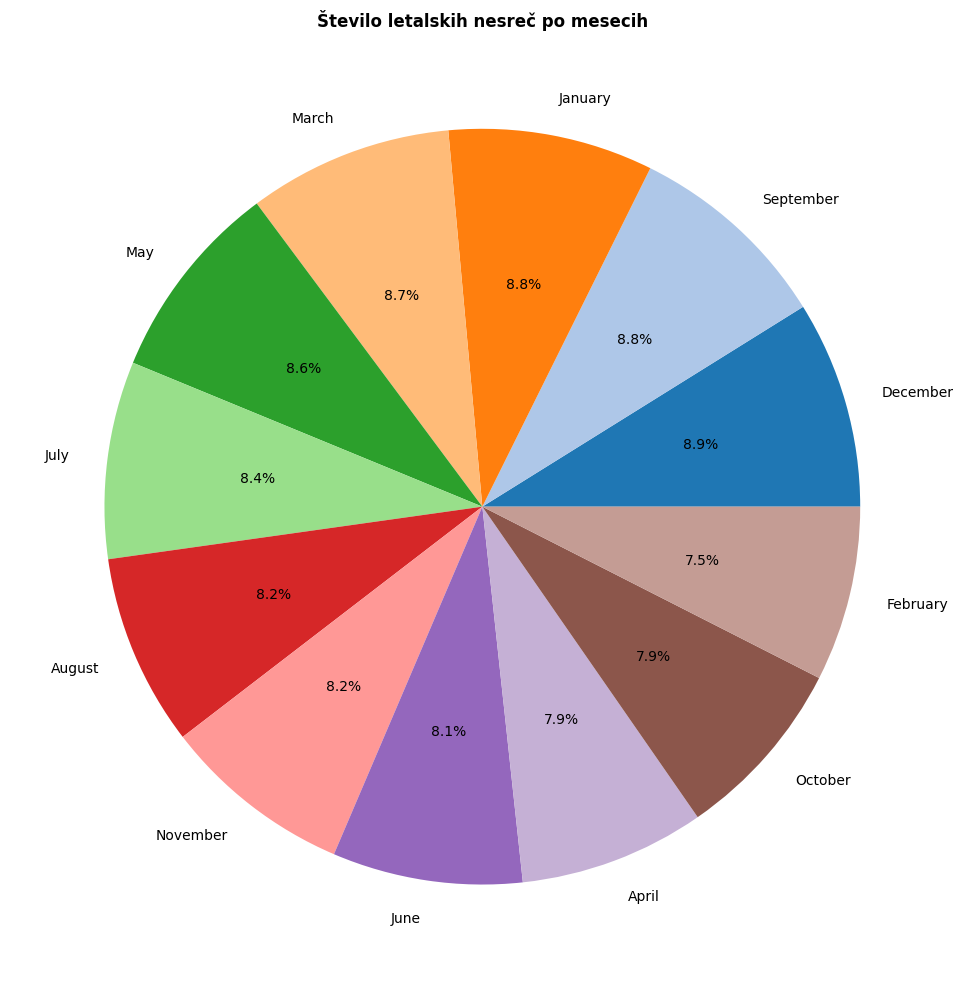

In [724]:
meseci.plot.pie(colors=barve, autopct='%1.1f%%', figsize=(10, 10), ylabel='')
plt.title('Število letalskih nesreč po mesecih', fontweight='bold')
plt.tight_layout()

### Analiza leta v katerem se je zgodilo največ nesreč

In [725]:
stevilo_nesrec_padajoce = letno_stevilo_nesrec.sort_values(by='letno_stevilo_nesrec', ascending = False)
najvecje_leto = stevilo_nesrec_padajoce.head(1)['leto']
leto = najvecje_leto.values[0]

In [726]:
f'Leto v katerem se je zgodilo največ letalskih nesreč je leto {leto}'

'Leto v katerem se je zgodilo največ letalskih nesreč je leto 1944'

V tem razdelku sem podrobneje analizirala leto 1944, v katerem je bilo zabeleženih največ letalskih nesreč. Prvi graf potrjuje, da je bilo v času druge svetovne vojne največ nesreč povezanih z vojaškimi leti. Ta ugotovitev nam pomaga razumeti, zakaj je bilo največ nesreč ravno v mesecih september in junij, kot je prikazano na naslednjem grafu. Visoko število nesreč septembra lahko povežemo z vojaško operacijo Market Garden, medtem ko je povečano število nesreč v juniju povezano z Normandijsko invazijo (dan D). Čeprav graf, ki prikazuje število nesreč po državah, kaže, da so Združene države Amerike skozi celo leto zabeležile največ nesreč, prav tako četrti graf razkriva, da je bil operater z največ nesrečami USAAF (United States Army Air Forces), kar kaže na visoko vpletenost ZDA v vojne operacije.

In [727]:
podatki_za_leto = letalske_nesrece[letalske_nesrece['leto'] == leto]
podatki_za_leto = podatki_za_leto.dropna()
narava_leta = podatki_za_leto.groupby(by=['narava_leta']).size().sort_values(ascending=False)

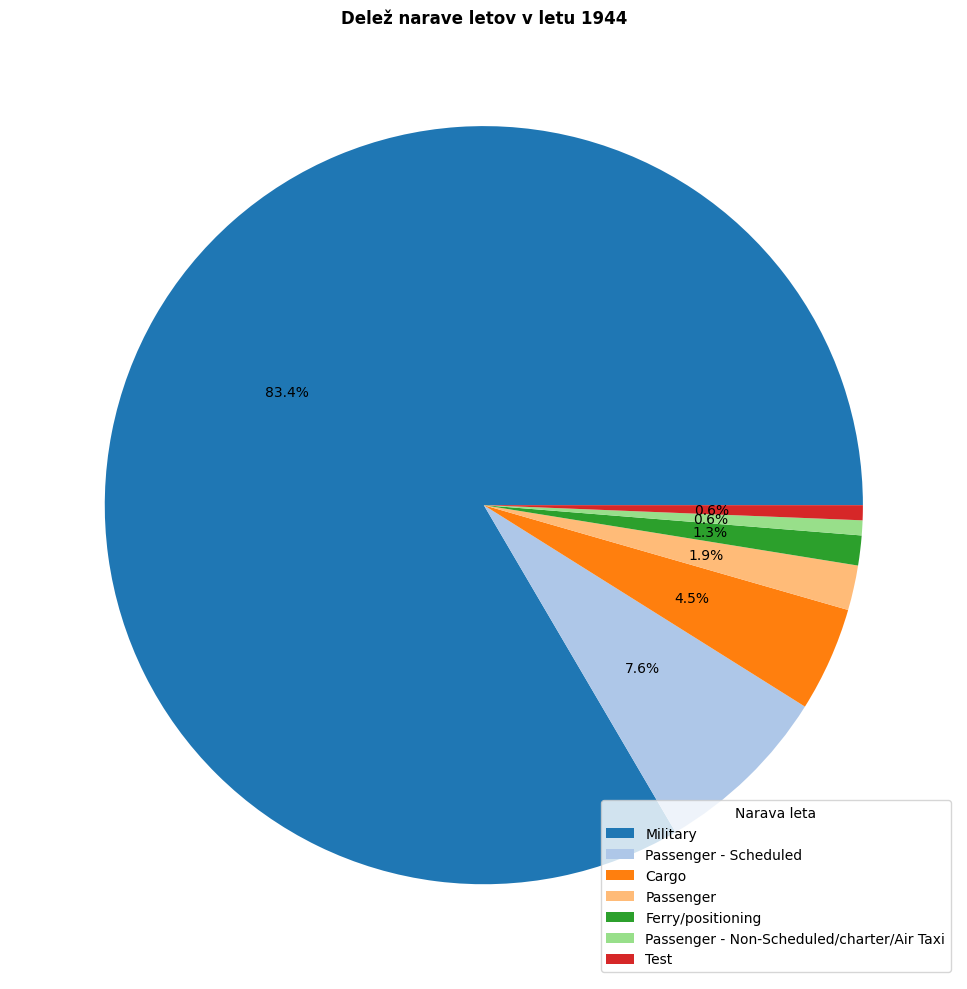

In [728]:
narava_leta.plot.pie(colors=barve, labels=None, autopct='%1.1f%%', figsize=(10, 10), ylabel='')
plt.title(f'Delež narave letov v letu {leto}', fontweight='bold')
plt.legend(narava_leta.index, loc='lower right', title='Narava leta')
plt.tight_layout()

In [729]:
meseci = podatki_za_leto.groupby(['mesec', 'mesec_stevilka']).size().reset_index(name='stevilo')
meseci = meseci.sort_values(by='mesec_stevilka')

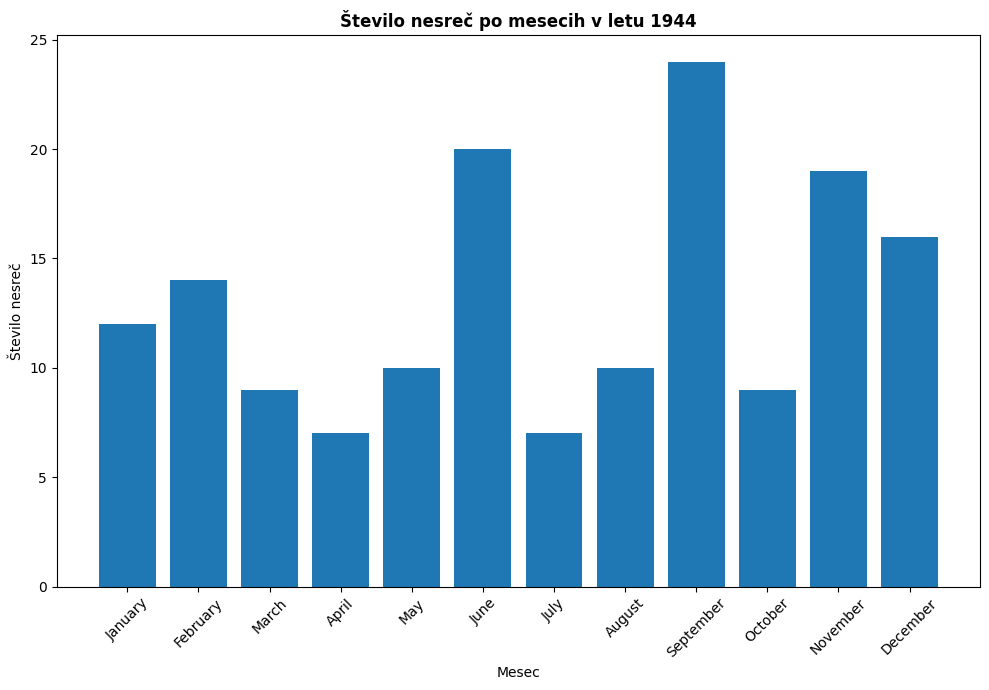

In [730]:
plt.figure(figsize=(10, 7))
plt.bar(meseci['mesec'], meseci['stevilo'])
plt.title(f'Število nesreč po mesecih v letu {leto}', fontweight='bold')
plt.xlabel('Mesec')
plt.ylabel('Število nesreč')
plt.xticks(rotation=45)
plt.tight_layout()

In [731]:
drzave = podatki_za_leto.groupby(by=['drzava_nesrece']).size().sort_values(ascending=False).head(12)

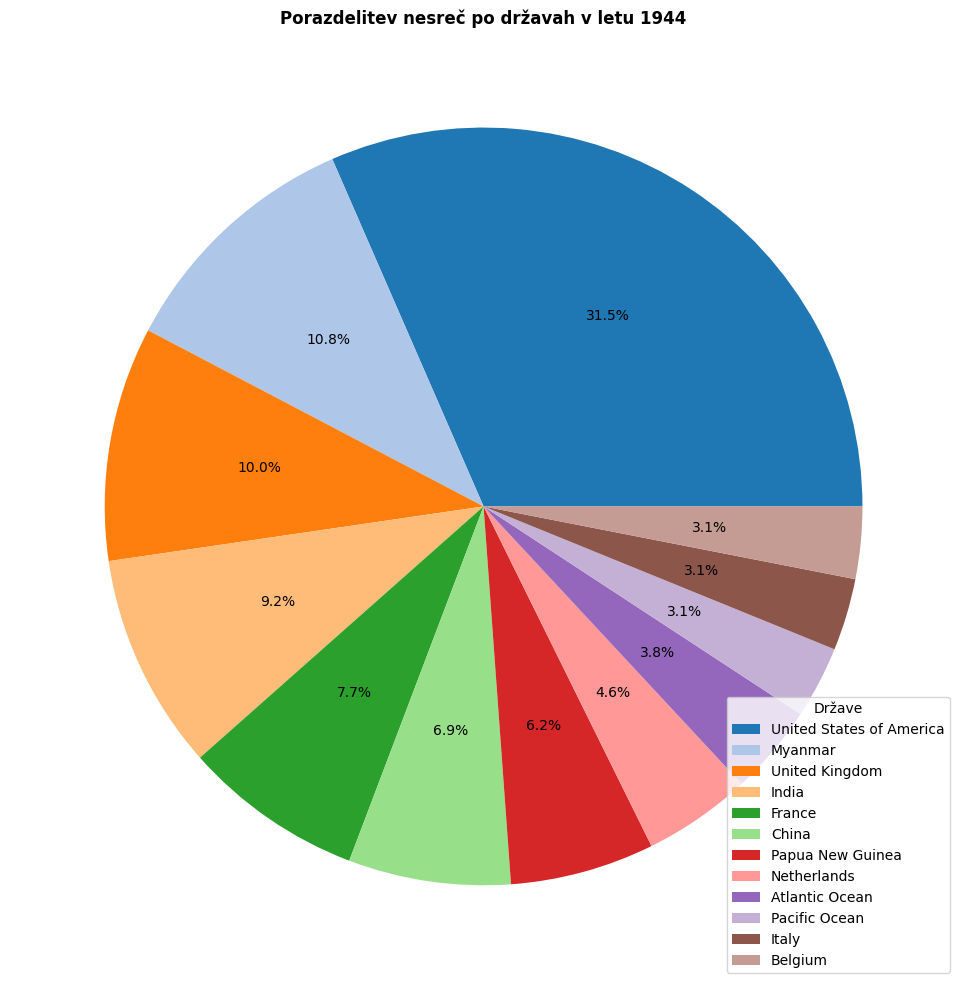

In [732]:
drzave.plot.pie(colors=barve, labels=None, autopct='%1.1f%%', figsize=(10, 10), ylabel='')
plt.title(f'Porazdelitev nesreč po državah v letu {leto}', fontweight='bold')
plt.legend(drzave.index, loc='lower right', title='Države')
plt.tight_layout()

In [733]:
operater = podatki_za_leto.groupby(by=['operater']).size().sort_values(ascending=False).head(7)

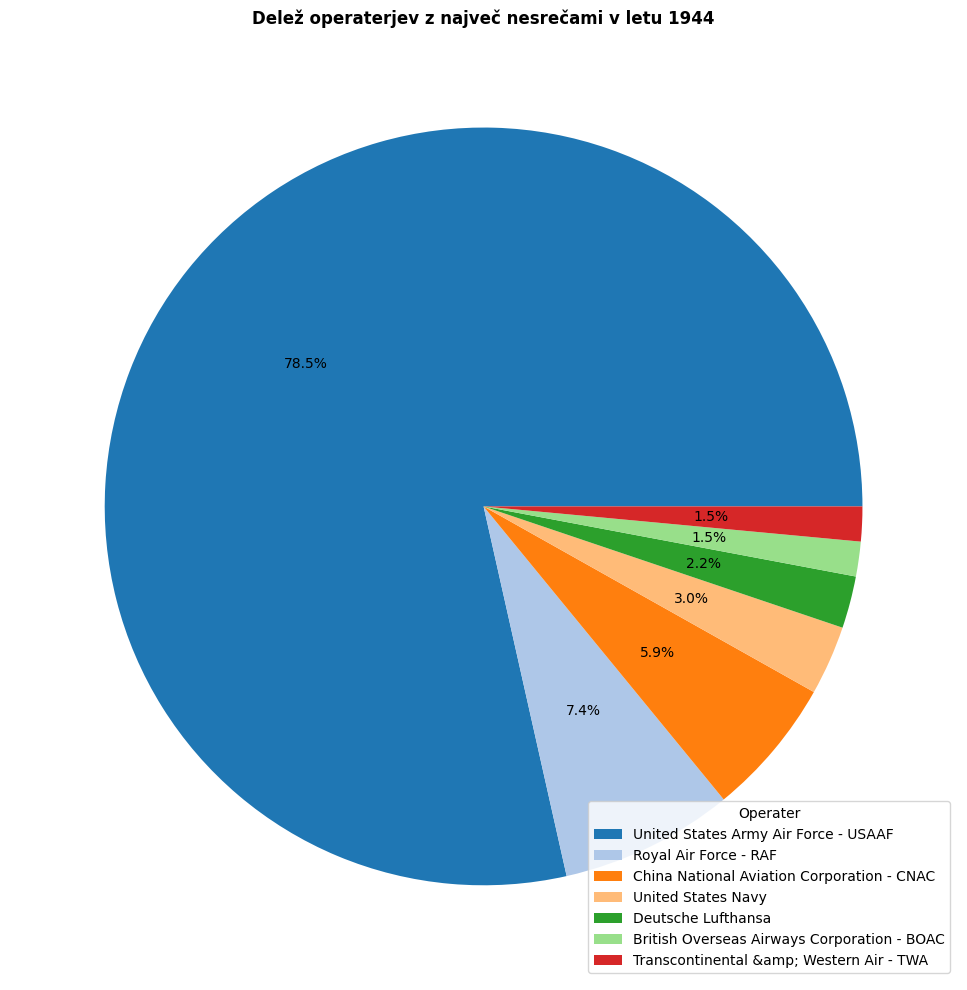

In [734]:
operater.plot.pie(colors=barve, labels=None, autopct='%1.1f%%', figsize=(10, 10), ylabel='')
plt.title(f'Delež operaterjev z največ nesrečami v letu {leto}', fontweight='bold')
plt.legend(operater.index, loc='lower right', title='Operater')
plt.tight_layout()

### Delež letalskih nesreč glede na fazo leta

Opazimo, da so najpogostejše faze leta, v katerih pride do nesreč, križarjenje, pristajanje in prilet. Križarjenje je običajno najdaljša faza leta, zato je tveganje večje zaradi dolgotrajnosti letenja. Pristajanje in prilet pa sta fazi z večjo obremenitvijo pilotov in večjo kompleksnostjo operacij, kar prav tako povečuje verjetnost nesreč.

In [735]:
faze = letalske_nesrece['faza_leta'].dropna().value_counts()

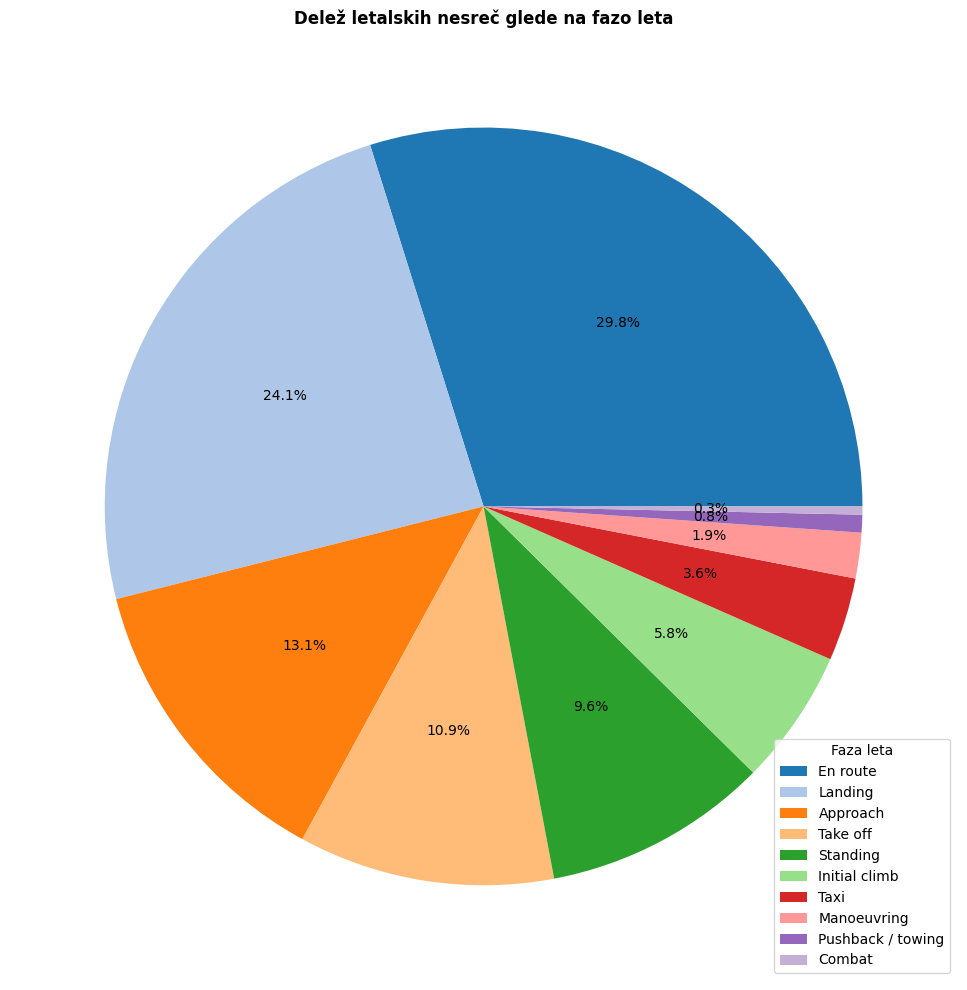

In [736]:
faze.plot.pie(colors=barve, labels=None, autopct='%1.1f%%', figsize=(10, 10), ylabel='')
plt.title('Delež letalskih nesreč glede na fazo leta', fontweight='bold')
plt.legend(faze.index, loc='lower right', title='Faza leta')
plt.tight_layout()

### Modeli letal z največ nesrečami

Pri analizi 12 modelov letal z največ zabeleženimi nesrečami opazimo, da med njimi prevladujejo predvsem civilna letala, kot so Cessna 208B Grand Caravan, de Havilland Canada DHC-6 Twin Otter 300 in Beechcraft 200 Super King Air. Vendar pa so med najpogostejšimi tudi nekateri modeli z vojaško zgodovino ali vojaško uporabo, kot so Douglas C-47-DL DC-3 in njegove različice, ki so bile ključna transportna letala med drugo svetovno vojno, ter Lisunov Li-2, sovjetska licenčna kopija DC-3, ki je imela prav tako vojaške namene. 

In [737]:
top_modeli = letalske_nesrece['model_letala'].dropna().value_counts().sort_values(ascending=False).head(12)

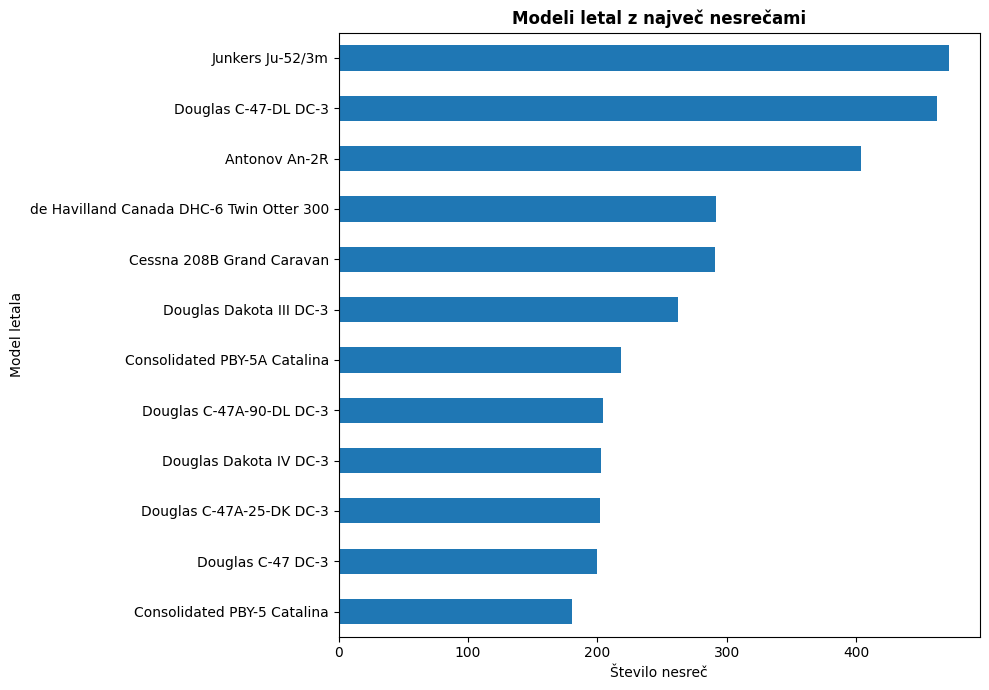

In [738]:
top_modeli.plot.barh(figsize=(10, 7))
plt.title('Modeli letal z največ nesrečami', fontweight='bold')
plt.xlabel('Število nesreč')
plt.ylabel('Model letala')
plt.gca().invert_yaxis()
plt.tight_layout()

### Razmerje preživelih

V tem razdelku sem podrobneje analizirala razmerje preživelih v letalskih nesrečah. Na prvem grafu lahko opazimo, da se je povprečno razmerje preživelih v zadnjih petdesetih letih postopoma izboljševalo. Nasprotno pa je razmerje preživelih v času druge svetovne vojne, ko je bilo število nesreč najvišje, izrazito nižje. Zelo visoko povprečje preživelih v prvih petnajstih letih opazujemo verjetno zaradi zelo nizkega števila zabeleženih nesreč v tem obdobju, kar lahko vpliva na statistiko. 

Na drugem grafu razdelka opazimo, da je povprečno razmerje preživelih najnižje pri vojaških letih, medtem ko je to najvišje pri padalskih, potniških in privatnih letih. Tretji graf kaže, da so največje absolutno število smrtnih žrtev zabeležili pri potniških, tovornih in vojaških letih. Visoko število smrtnih žrtev pri potniških letih je mogoče pripisati večjemu številu ljudi na krovu, veliki frekvenci letov in posledično večji izpostavljenosti tveganju. Prav tako sem v zadnjem grafu poskusila najti razmerje med številom preživelih in starostjo letala

In [739]:
tabela = letalske_nesrece.dropna(subset=['razmerje_prezivelih'])
povprecje_letno = tabela.groupby('leto')['razmerje_prezivelih'].mean()

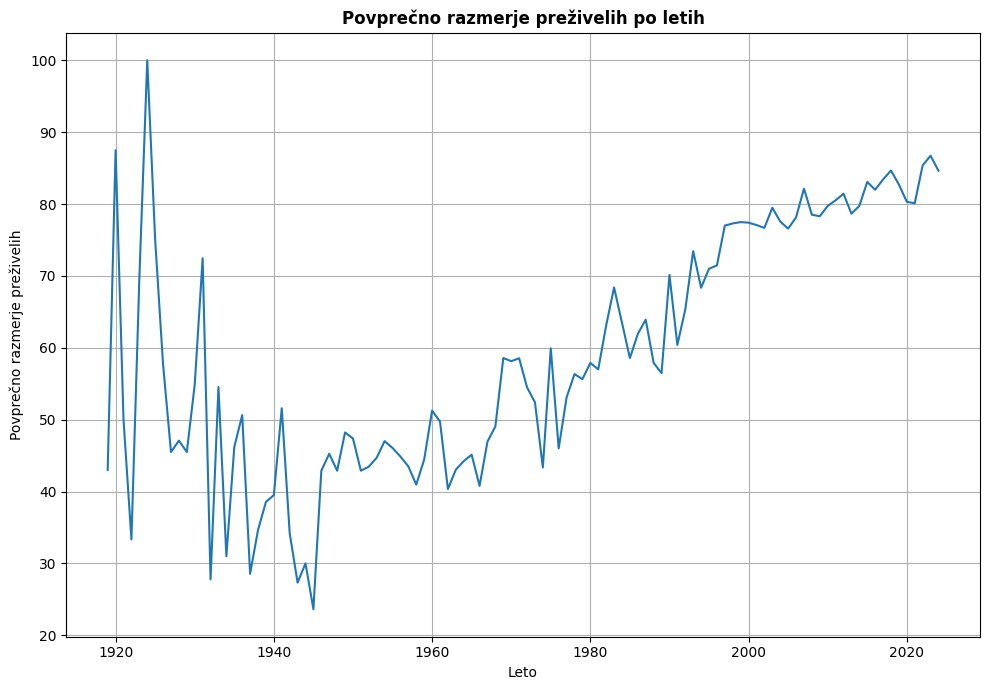

In [740]:
povprecje_letno.plot.line(figsize=(10, 7))
plt.title('Povprečno razmerje preživelih po letih', fontweight='bold')
plt.xlabel('Leto')
plt.ylabel('Povprečno razmerje preživelih')
plt.tight_layout()
plt.grid(True)

In [741]:
letalske_nesrece = letalske_nesrece.dropna()
povprecno_razmerje = letalske_nesrece.groupby('narava_leta')['razmerje_prezivelih'].mean().sort_values(ascending=False)

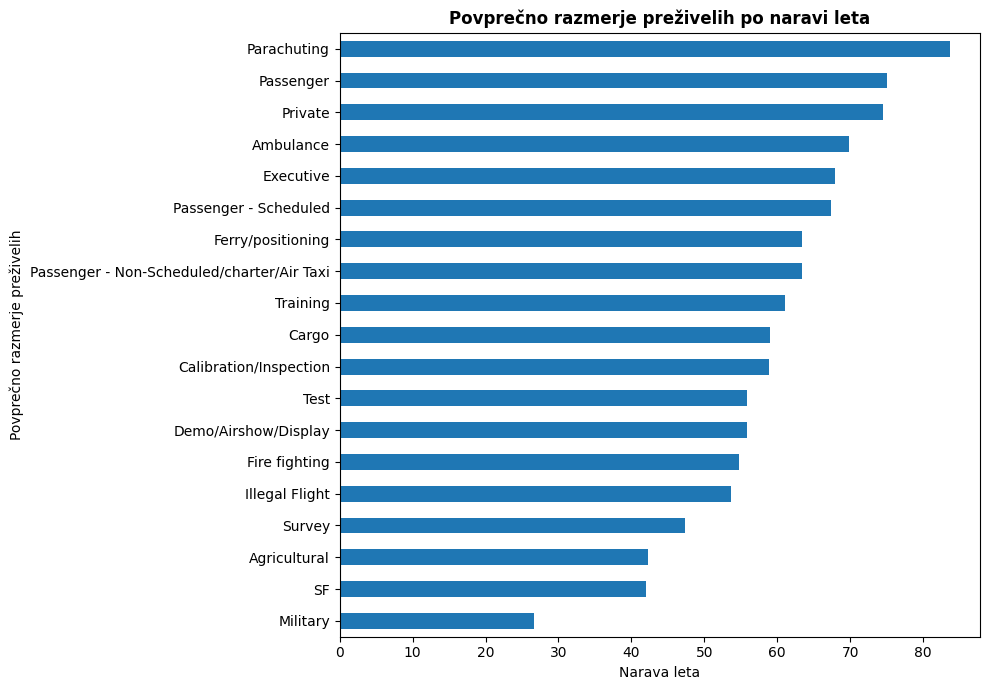

In [742]:
povprecno_razmerje.plot.barh(figsize=(10,7))
plt.title('Povprečno razmerje preživelih po naravi leta', fontweight='bold')
plt.ylabel('Povprečno razmerje preživelih')
plt.xlabel('Narava leta')
plt.gca().invert_yaxis()
plt.tight_layout()

In [743]:
tabela = letalske_nesrece.dropna(subset=['narava_leta', 'smrtne_zrtve'])
primerjava = tabela.groupby('narava_leta')['smrtne_zrtve'].size().sort_values(ascending=False)

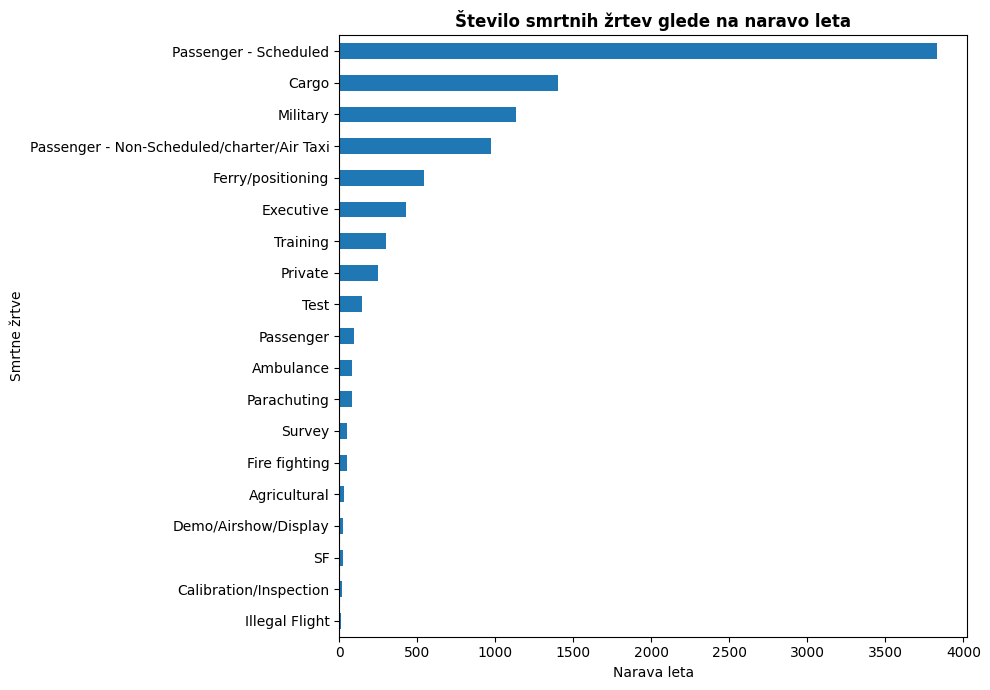

In [744]:
primerjava.plot.barh(figsize=(10,7))
plt.title('Število smrtnih žrtev glede na naravo leta', fontweight='bold')
plt.ylabel('Smrtne žrtve')
plt.xlabel('Narava leta')
plt.gca().invert_yaxis()
plt.tight_layout()

### Starost letala

Prvi graf prikazuje razmerje preživelih v nesrečah glede na starost letala. Opazimo, da je bilo več nesreč pri letalih, starih do približno 30 let, kar je razvidno tudi na tretjem grafu, ki prikazuje porazdelitev starosti letal udeleženih v nesrečah. V tem starostnem območju so razmerja preživelih zelo razpršena, kar pomeni, da ni jasnega vzorca glede preživetja glede na starost letala – nekatere nesreče so imele visoko, druge nizko stopnjo preživetja. Drugi graf prikazuje trend povprečne starosti letal v nesrečah skozi čas. Opazimo lahko, da se povprečna starost letal ob nesreči zadnjih 70 let viša. Najnižja povprečna starost letal je bila prav v času druge svetovne vojne, kar nakazuje, da se je takrat poškodovalo veliko novejših letal. To sklepanje potrjuje tudi zadnji graf, kjer je razvidno, da je povprečna starost letal pri vojaških nesrečah najnižja.

In [745]:
tabela = letalske_nesrece.dropna(subset=['starost_letala', 'razmerje_prezivelih'])

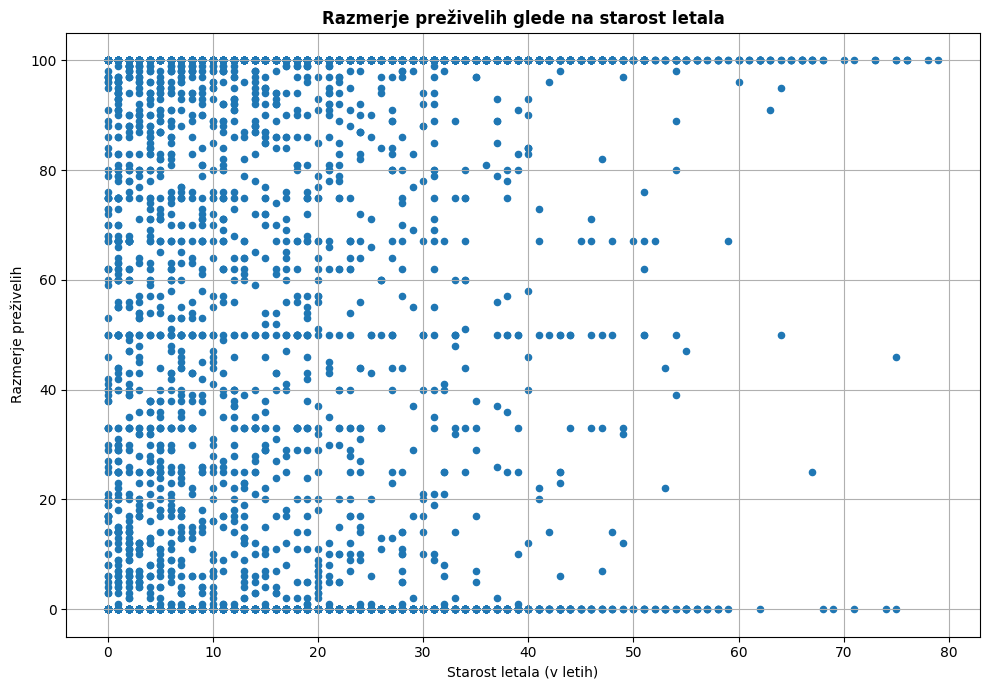

In [746]:
tabela.plot.scatter(x='starost_letala', y='razmerje_prezivelih', figsize=(10, 7))
plt.title('Razmerje preživelih glede na starost letala', fontweight='bold')
plt.xlabel('Starost letala (v letih)')
plt.ylabel('Razmerje preživelih')
plt.grid(True)
plt.tight_layout()

In [747]:
povprecna_starost_letala = tabela.groupby('leto')['starost_letala'].mean()

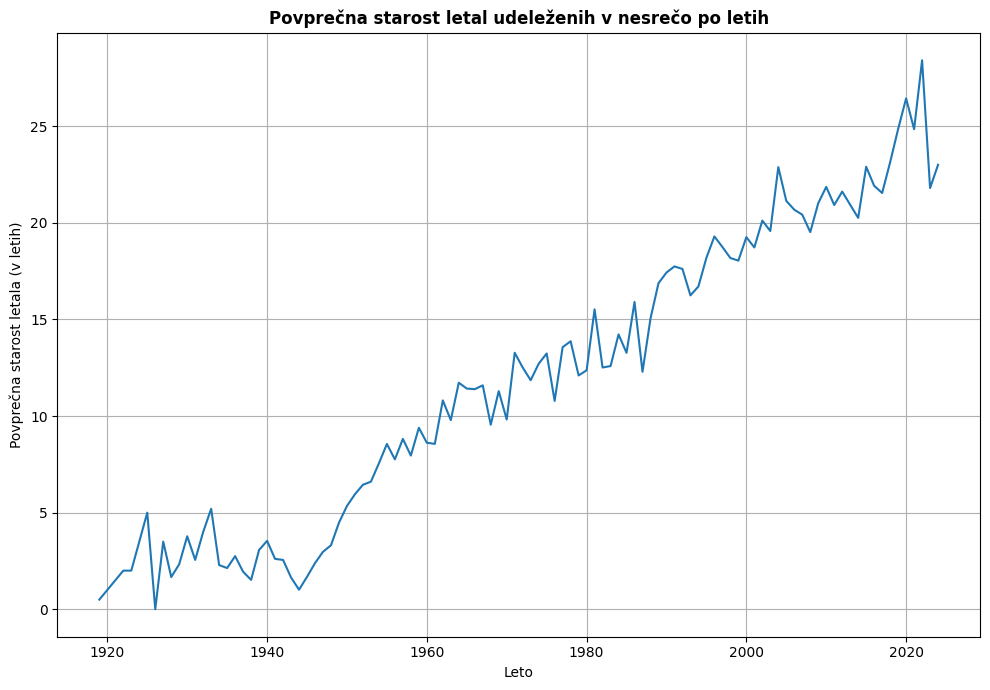

In [748]:
povprecna_starost_letala.plot.line(figsize=(10, 7))
plt.title('Povprečna starost letal udeleženih v nesrečo po letih', fontweight='bold')
plt.xlabel('Leto')
plt.ylabel('Povprečna starost letala (v letih)')
plt.grid(True)
plt.tight_layout()

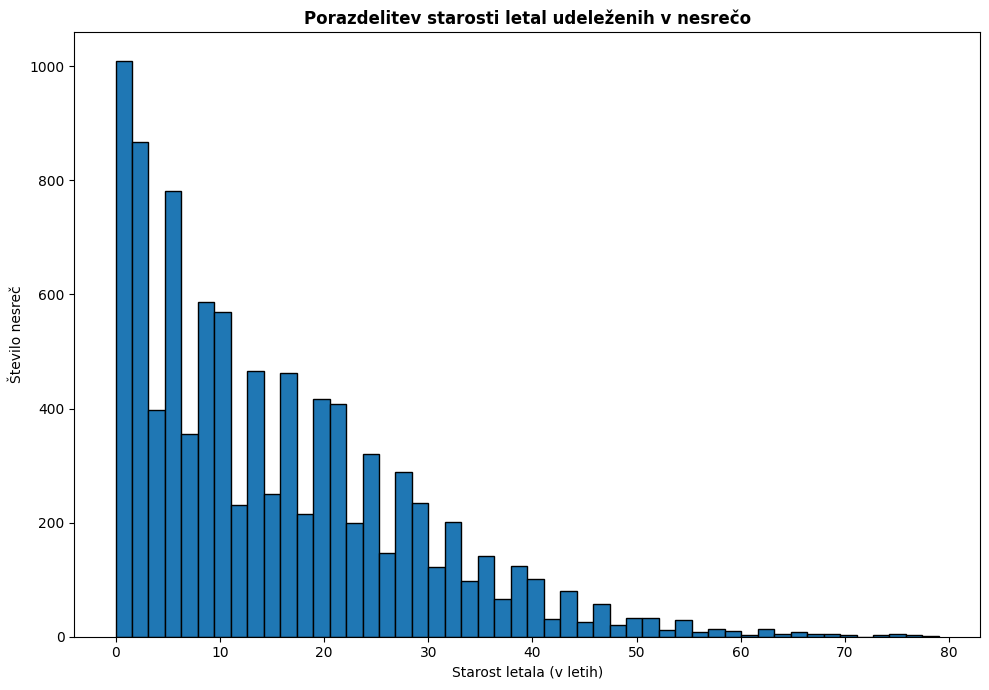

In [749]:
letalske_nesrece['starost_letala'].dropna().astype(float).plot.hist(bins=50, edgecolor='black', figsize=(10, 7))
plt.title('Porazdelitev starosti letal udeleženih v nesrečo', fontweight='bold')
plt.xlabel('Starost letala (v letih)')
plt.ylabel('Število nesreč')
plt.tight_layout()
plt.show()

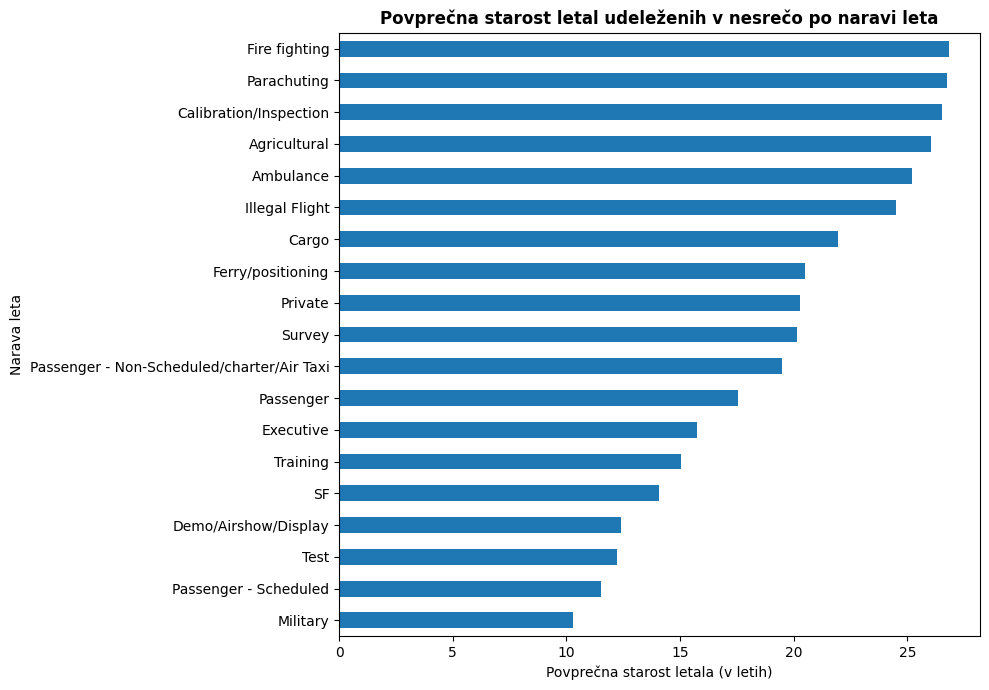

In [750]:
letalske_nesrece = letalske_nesrece.dropna()
povprecna_starost = letalske_nesrece.groupby('narava_leta')['starost_letala'].mean().sort_values()
povprecna_starost.plot.barh(figsize=(10,7))
plt.title('Povprečna starost letal udeleženih v nesrečo po naravi leta', fontweight='bold')
plt.ylabel('Narava leta')
plt.xlabel('Povprečna starost letala (v letih)')
plt.tight_layout()

### Škoda letala

V tem razdelku si bomo podrobneje ogledali vrste škode, ki so jih utrpela letala ob letalskih nesrečah. Iz prvega grafa lahko razberemo, da so največji deleži škode klasificirani kot uničeno in odpisano, obsežno poškodovano in popravljeno ter obsežno poškodovano in odpisano. Podobne trende lahko opazimo tudi na naslednjih dveh grafih, ki prikazujeta število nesreč glede na fazo leta in naravo leta, pri čemer je škoda na letalu dodatno razčlenjena.

In [751]:
skoda_letala = letalske_nesrece['skoda_letala'].dropna().value_counts()

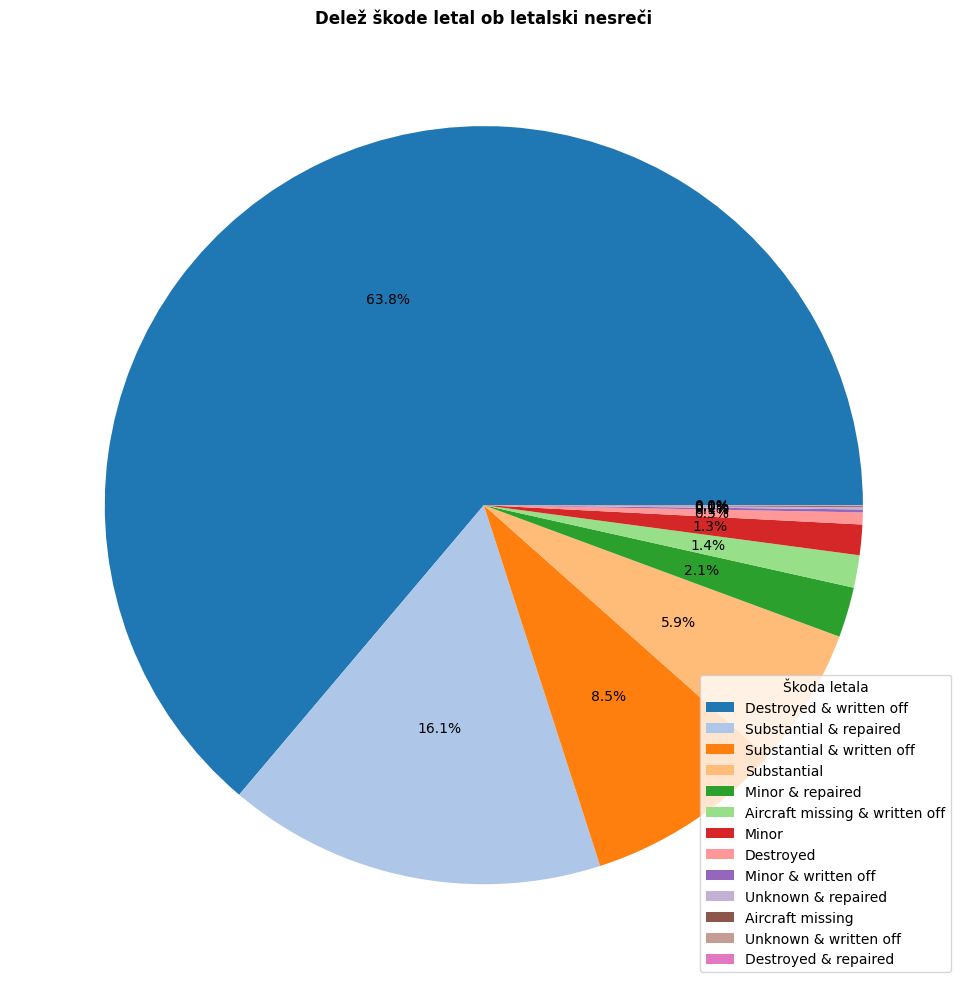

In [752]:
skoda_letala.plot.pie(colors=barve, autopct='%1.1f%%', labels=None, figsize=(10, 10), ylabel='')
plt.title('Delež škode letal ob letalski nesreči', fontweight='bold')
plt.legend(skoda_letala.index, loc='lower right', title='Škoda letala')
plt.tight_layout()

In [753]:
tabela = letalske_nesrece.dropna(subset=['faza_leta', 'skoda_letala']).groupby(['faza_leta', 'skoda_letala']).size().reset_index(name='stevilo')
pivot_tabela = tabela.pivot(index='faza_leta', columns='skoda_letala', values='stevilo')

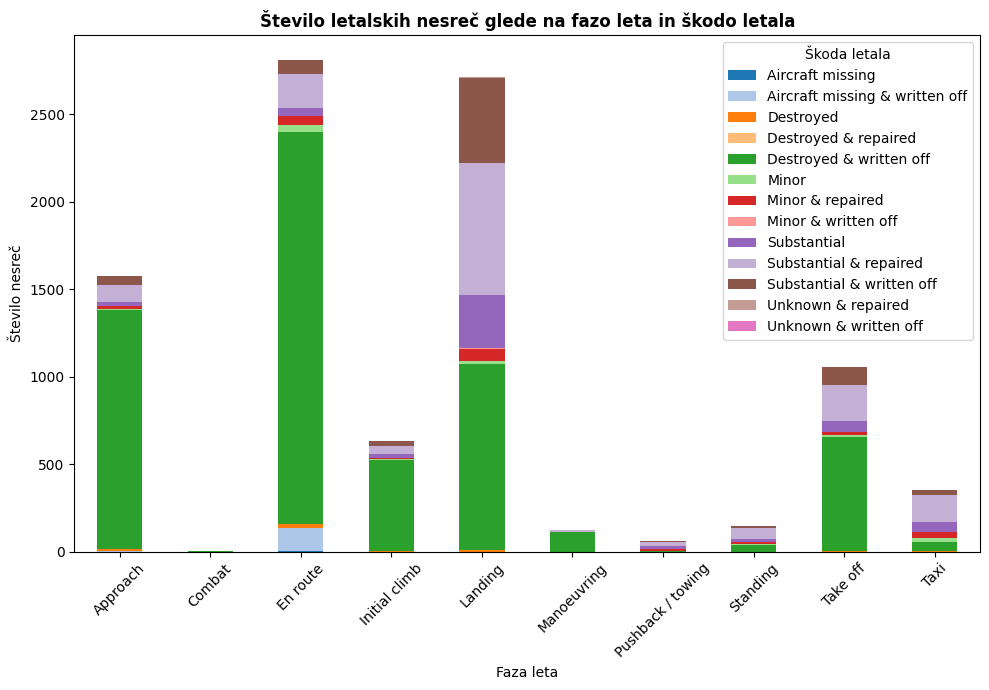

In [754]:
pivot_tabela.plot.bar(color=barve, figsize=(10, 7), stacked=True)
plt.title('Število letalskih nesreč glede na fazo leta in škodo letala', fontweight='bold')
plt.xlabel('Faza leta')
plt.ylabel('Število nesreč')
plt.xticks(rotation=45)
plt.legend(title='Škoda letala')
plt.tight_layout()

In [755]:
tabela = letalske_nesrece.dropna(subset=['narava_leta', 'skoda_letala']).groupby(['narava_leta', 'skoda_letala']).size().reset_index(name='stevilo')
pivot = tabela.pivot(index='narava_leta', columns='skoda_letala', values='stevilo')

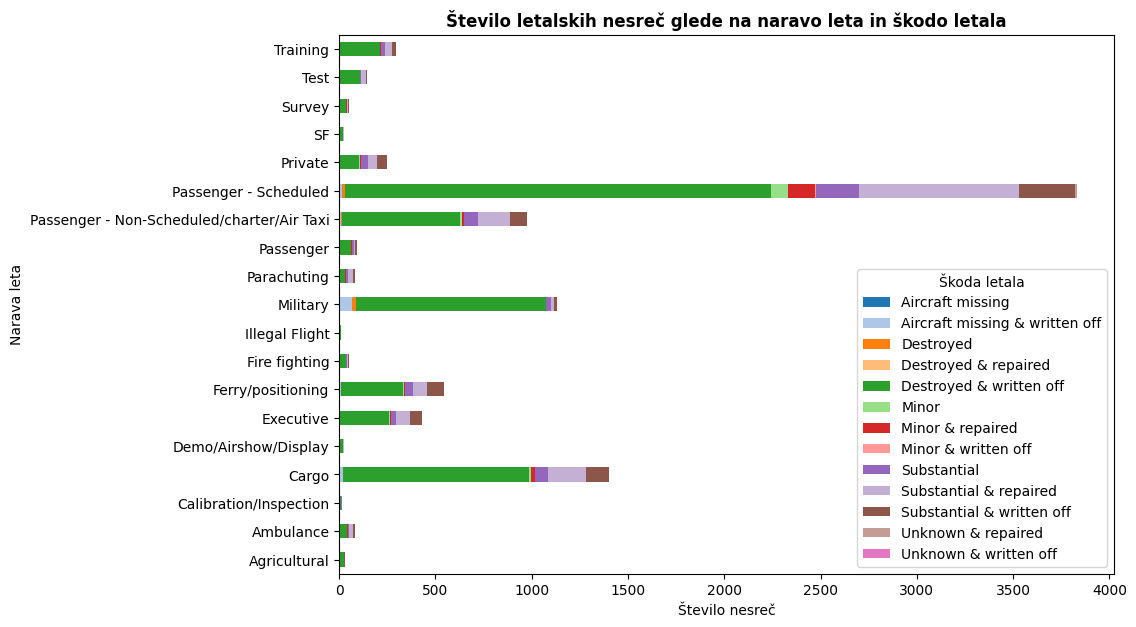

In [756]:
pivot.plot.barh(color=barve, figsize=(10, 7), stacked=True)
plt.title('Število letalskih nesreč glede na naravo leta in škodo letala', fontweight='bold')
plt.xlabel('Število nesreč')
plt.ylabel('Narava leta')
plt.legend(loc='lower right', title='Škoda letala')

### Država z največjim številom letalskih nesreč

In [757]:
nesrece_po_drzavah = letalske_nesrece['drzava_nesrece'].dropna().value_counts()
drzava_max_nesrec = nesrece_po_drzavah.idxmax()
stevilo_nesrec = nesrece_po_drzavah.max()

In [758]:
f'Država z največ letalskimi nesrečami je {drzava_max_nesrec} s {stevilo_nesrec} nesrečami.'

'Država z največ letalskimi nesrečami je United States of America s 2548 nesrečami.'

Ugotovili smo, da so Združene države Amerike država z največjim številom zabeleženih letalskih nesreč. Opazimo lahko, da se je število nesreč v zadnjih desetletjih povečalo, čeprav graf močno niha. Poleg tega izstopa obdobje druge svetovne vojne, ko je bilo zabeleženih veliko število nesreč, kar potrjuje tudi naša predhodna analiza za leto 1944.

In [759]:
nesrece_drzava = letalske_nesrece[letalske_nesrece['drzava_nesrece'] == drzava_max_nesrec]
letno_stevilo_drzava = nesrece_drzava.groupby('leto').size().reset_index(name='stevilo_nesrec')

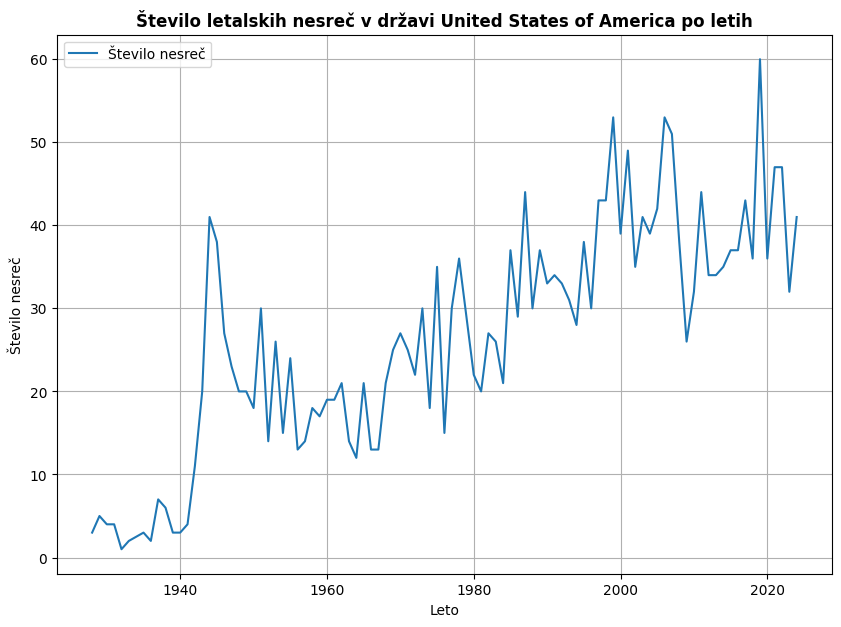

In [760]:
letno_stevilo_drzava.plot.line(x='leto', y='stevilo_nesrec', figsize=(10,7))
plt.title(f'Število letalskih nesreč v državi {drzava_max_nesrec} po letih', fontweight='bold')
plt.xlabel('Leto')
plt.ylabel('Število nesreč')
plt.grid(True)
plt.legend(['Število nesreč'])
plt.show()